In [2]:
# Step 1: Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")

print("Libraries imported successfully!")



Libraries imported successfully!


In [3]:
# Step 2: Load dataset

df = pd.read_csv("../data/Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Step 3: Check missing values

df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
# Step 4: Encode categorical variables

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [7]:
# Step 5: Train-test split

X = df_encoded.drop('price', axis=1)   # features
y = df_encoded['price']                # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train and test sets created!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Train and test sets created!
X_train shape: (436, 13)
X_test shape: (109, 13)


In [8]:
# Step 6: Train Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed!")


Model training completed!


In [9]:
# Step 7: Model Evaluation

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("MAE  :", mae)
print("MSE  :", mse)
print("RMSE :", rmse)
print("R² Score:", r2)


Model Evaluation Metrics:
MAE  : 970043.4039201637
MSE  : 1754318687330.6643
RMSE : 1324506.9600914388
R² Score: 0.6529242642153184


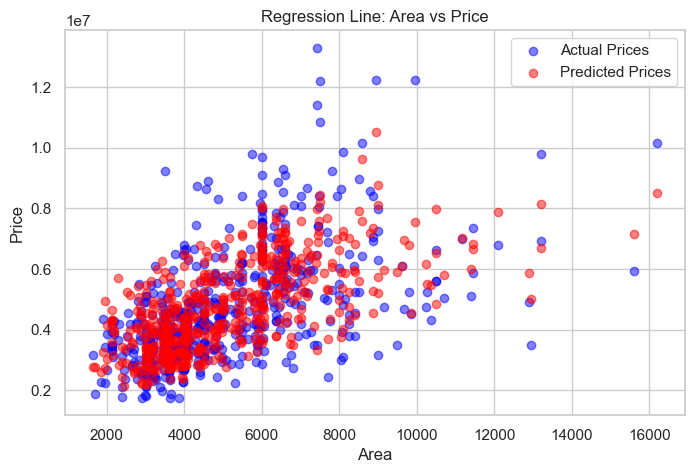

In [10]:
# Step 8: Plot Regression Line (area vs price)

plt.figure(figsize=(8,5))

# Actual data points
plt.scatter(df['area'], df['price'], color='blue', alpha=0.5, label="Actual Prices")

# Predicted regression line
pred_line = model.predict(df_encoded.drop('price', axis=1))
plt.scatter(df['area'], pred_line, color='red', alpha=0.5, label="Predicted Prices")

plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Regression Line: Area vs Price")
plt.legend()
plt.show()


In [11]:
Insights From Linear Regression Model
1. Data Relationship

Area has a strong positive relationship with price.

Higher area → higher predicted price.

Some categorical features such as furnishingstatus and mainroad also impact the price.

2. Model Accuracy

R² Score = 0.65, meaning the model explains 65% of house price variability.

This is acceptable for a simple regression model.

3. Error Metrics

MAE ≈ 9.7 lakhs

RMSE ≈ 13.2 lakhs
This means, on average, predictions are off by around 10–13 lakh rupees.

4. Regression Line Interpretation

The red line indicates predicted price trend.

The model captures the upward trend of “area vs price” but has some spread due to other influencing features.

5. Important Factors Affecting House Price

Area (largest positive influence)

Parking availability

Number of bedrooms & bathrooms

Furnishing status

Location-related features like mainroad and prefarea

6. Model Limitations

Linear regression assumes linear relationships.

Some features may relate nonlinearly to price.

Outliers may affect prediction quality.

SyntaxError: invalid character '→' (U+2192) (3190646469.py, line 6)